# Exploratory Data Analysis (EDA)

### What is Exploratory Data Analysis (EDA)?
EDA is a crucial first step in the data analysis process. It involves summarizing, visualizing, and understanding the data to uncover patterns, identify anomalies, and form hypotheses.

#### Key Objectives of EDA:
- **Understand the data structure:** What columns exist? What do they represent?
- **Spot data issues:** Missing values, duplicates, inconsistencies.
- **Find relationships:** Between variables (e.g., correlations, trends).
- **Guide the next steps:** Data cleaning, feature engineering, model building.`

#### Why is EDA Important?
- **Communicating insights:** Simplify complex datasets into actionable knowledge.
- **Identifying trends:** Spot outliers or unexpected patterns early.
- **Ensuring data quality:** Clean and preprocess data for further analysis.
- **Avoiding biases:** Avoid jumping to conclusions without evidence.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
df = pd.read_csv('data_science_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,bonus
0,2023,SE,FT,Principal Data Scientist,80000,EUR,94962.32184,ES,100,ES,L,9115.321837
1,2023,MI,CT,ML Engineer,30000,USD,35778.21438,US,100,US,S,5778.214379
2,2023,MI,CT,ML Engineer,25500,USD,29574.87683,US,100,US,S,4074.876827
3,2023,SE,FT,Data Scientist,175000,USD,199464.78520,CA,100,CA,M,24464.785210
4,2023,SE,FT,Data Scientist,120000,USD,128808.33550,CA,100,CA,M,8808.335528


### EDA 1: Initial Exploration
In this step, we’ll explore the dataset's structure, inspect the columns, and identify potential issues. The goal is to gain a deeper understanding of the data before proceeding to advanced analysis.

##### Exploring the Structure of the Dataset

In [237]:
# size of the data
df.shape

(2584, 12)

In [239]:
# Checking for missing values
print("Missing Values in Each Column:")
df.isnull().sum().sort_values(ascending=False)

Missing Values in Each Column:


bonus                 7
employment_type       2
work_year             0
experience_level      0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [241]:
# checking data types
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                  int64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
bonus                 float64
dtype: object

In [243]:
# Unique values in categorical columns
categorical_columns = ['experience_level', 'employment_type', 'job_title', 
                       'salary_currency', 'employee_residence', 
                       'company_location', 'company_size']
print("Unique Values in Categorical Columns: \n")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")
    print('----'*20)

Unique Values in Categorical Columns: 

experience_level: ['SE' 'MI' 'EN' 'EX']
--------------------------------------------------------------------------------
employment_type: ['FT' 'CT' nan 'FL' 'PT']
--------------------------------------------------------------------------------
job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data 

In [245]:
# Value counts for key columns
df['experience_level'].value_counts()

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

In [247]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,2584.0,2022.301084,0.749179,2020.000000,2022.000000,2022.00000,2023.00000,2.023000e+03
salary,2584.0,210365.296440,808037.535609,6000.000000,90000.000000,134630.00000,182562.50000,3.040000e+07
salary_in_usd,2584.0,150024.565973,75791.011228,5810.419215,94812.558850,144188.26040,197622.88720,5.314747e+05
remote_ratio,2584.0,50.483746,48.163707,0.000000,0.000000,50.00000,100.00000,1.000000e+02
bonus,2577.0,16591.133045,10678.466918,350.194419,8746.856741,14448.96128,22301.24304,8.326635e+04


##### Dealing with Missing Values
In this step, we'll handle any missing or null values in the dataset. Missing data can impact analysis and must be addressed before proceeding with further exploratory and statistical analysis.

##### Strategies for Handling Missing Values
- **Drop Rows or Columns:**
    - If missing values are few and unimportant, dropping them is a quick solution.
- **Impute Missing Values:**
    - Numerical Columns: Use the mean, median, or mode.
    - Categorical Columns: Replace with the most frequent value or a placeholder like "Unknown".

In [251]:
# drop employment type missing rows
df.dropna(subset=['employment_type'], inplace=True)

In [253]:
# fill the missing value in the bonus column with the mean value
df['bonus'] = df['bonus'].fillna(df['bonus'].mean())

In [255]:

# Verify that missing values are handled
print("Missing Values After Cleaning:")
df.isnull().sum()

Missing Values After Cleaning:


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
bonus                 0
dtype: int64

##### Data Analysis

In [258]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Dataset after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Dataset after removing duplicates: (2582, 12)


### Univariate Analysis

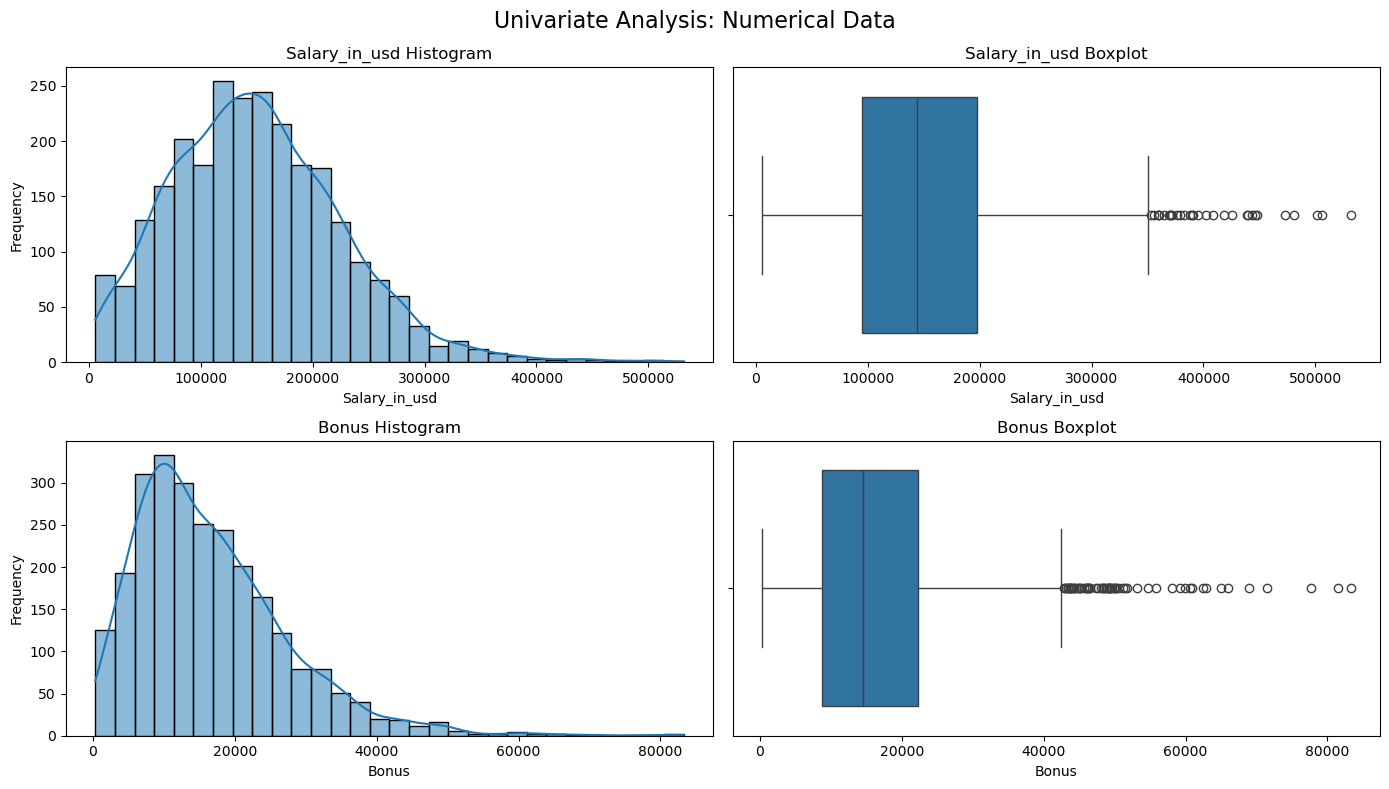

In [261]:
# Major Numerical Columns
numerical_columns = ['salary_in_usd', 'bonus']

# Set up subplots for numerical analysis
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(14, 8))
fig.suptitle("Univariate Analysis: Numerical Data", fontsize=16)

for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[column], bins= 30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"{column.capitalize()} Histogram")
    axes[i, 0].set_xlabel(column.capitalize())
    axes[i, 0].set_ylabel("Frequency")
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f"{column.capitalize()} Boxplot")
    axes[i, 1].set_xlabel(column.capitalize())

plt.tight_layout()
plt.show()

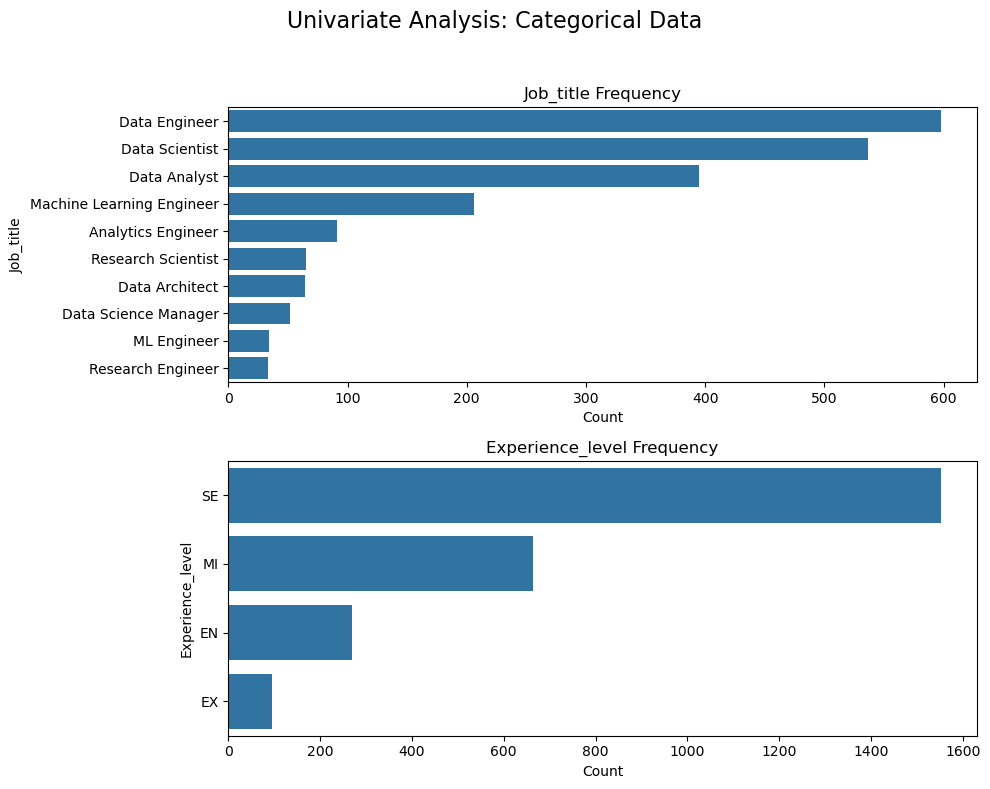

In [262]:
# Major Categorical Columns
categorical_columns = ['job_title', 'experience_level']

# Set up subplots for categorical analysis
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 8))
fig.suptitle("Univariate Analysis: Categorical Data", fontsize=16)

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, y=column, order=df[column].value_counts().head(10).index, ax=axes[i])
    axes[i].set_title(f"{column.capitalize()} Frequency")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(column.capitalize())

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Bivariate Analysis: Analyzing Relationships Between Two Variables
Bivariate analysis involves examining the relationship between two variables, which could either be numerical or categorical.

##### Steps for Bivariate Analysis:
**Numerical vs Numerical:**
- Scatter plots: To check for linear or non-linear relationships between two numerical variables.
- Correlation Matrix: To check the strength and direction of relationships between numerical variables.

**Categorical vs Numerical:**
- Boxplots: To check how a numerical variable behaves across different categories in a categorical variable (e.g., how salary_in_usd varies across experience_level).

**Categorical vs Categorical:**
- Grouped Bar Plots: To compare the counts of categories across different levels of another categorical variable (e.g., how job_title varies by company_size).

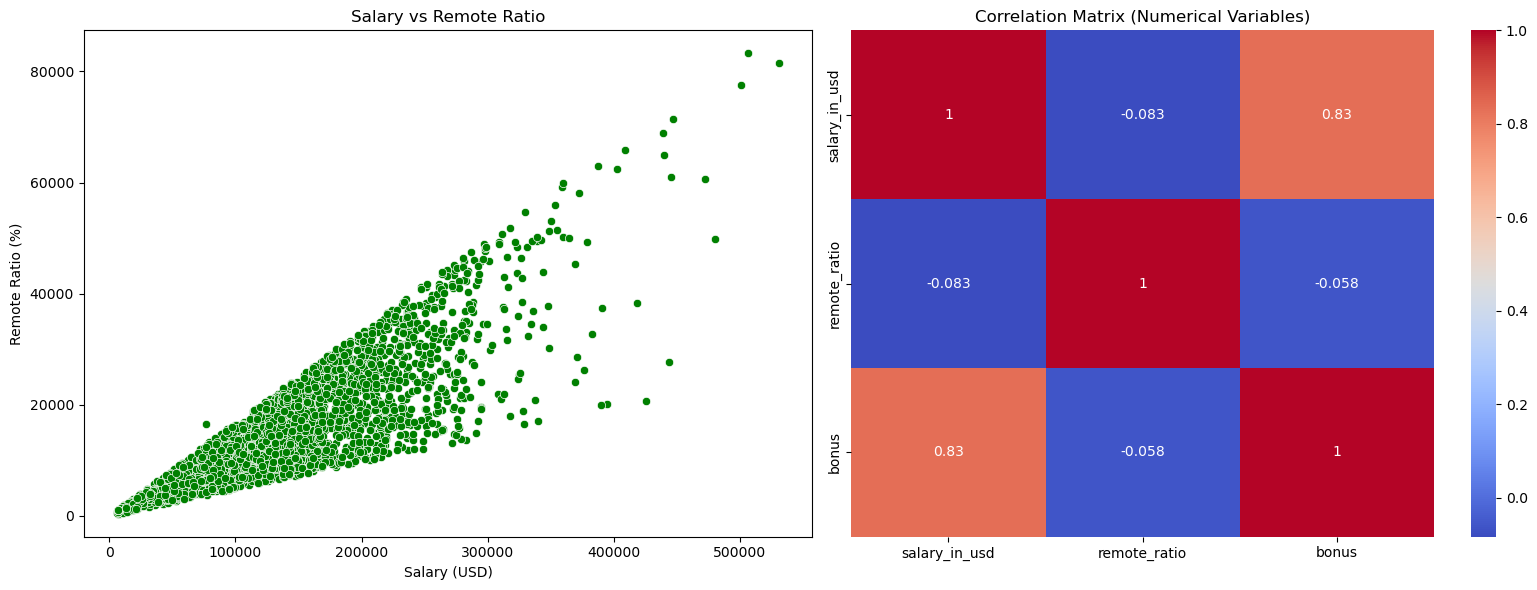

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Numerical vs Numerical: Scatter plot and Correlation Matrix
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: salary_in_usd vs remote_ratio
sns.scatterplot(data=df, x='salary_in_usd', y='bonus', ax=axes[0], color='green')
axes[0].set_title('Salary vs Remote Ratio')
axes[0].set_xlabel('Salary (USD)')
axes[0].set_ylabel('Remote Ratio (%)')

# Correlation matrix: To see correlation between numerical variables
correlation_matrix = df[['salary_in_usd', 'remote_ratio', 'bonus']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix (Numerical Variables)')

plt.tight_layout()
plt.show()

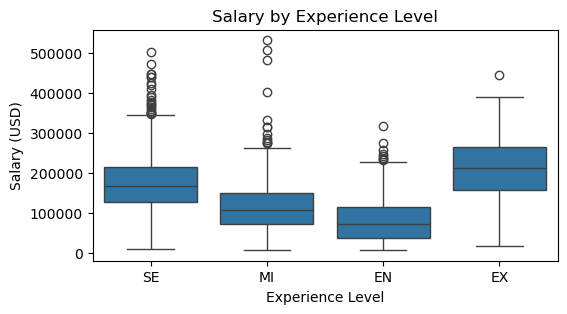

In [268]:
# Categorical vs Numerical: Boxplot (e.g., salary across experience levels)
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

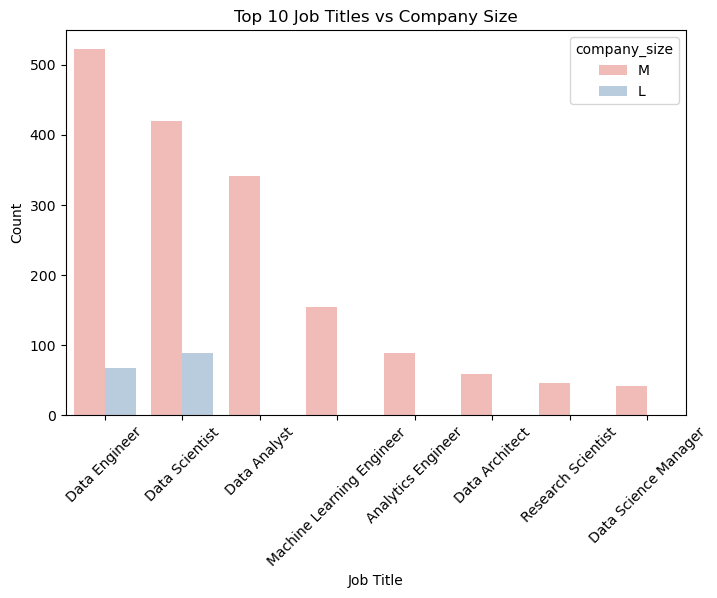

In [270]:
# Sort the data by the count of job titles and company sizes
job_title_counts = df.groupby(['job_title', 'company_size']).size().reset_index(name='count')

# Sort by the 'count' column in descending order
job_title_counts_sorted = job_title_counts.sort_values(by='count', ascending=False).head(10)

# Plot the top 10 job titles vs company size using a grouped bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=job_title_counts_sorted, x='job_title', y='count', hue='company_size', palette='Pastel1')
plt.title('Top 10 Job Titles vs Company Size')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [279]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'bonus'],
      dtype='object')


### Multivariate Analysis Overview
Multivariate analysis involves analyzing multiple variables simultaneously to uncover relationships and patterns between them. This can be achieved using various visualizations and aggregation methods. 

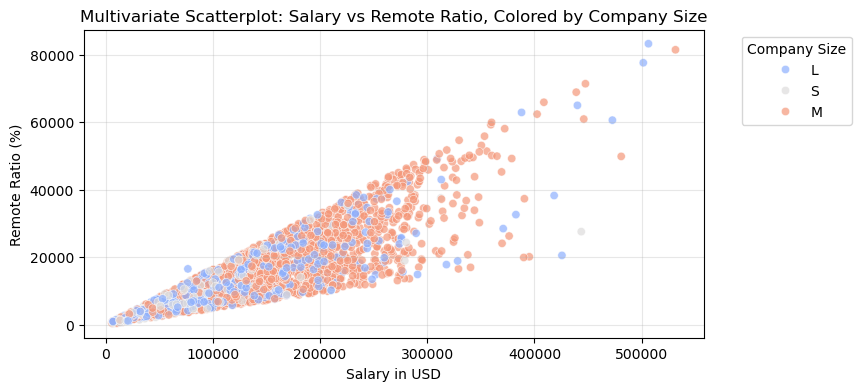

In [292]:
# Scatterplot for multivariate analysis
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df, 
    x='salary_in_usd', 
    y='bonus', 
    hue='company_size', 
    sizes=(20, 200), 
    palette='coolwarm',
    alpha=0.7
)
plt.title('Multivariate Scatterplot: Salary vs Remote Ratio, Colored by Company Size')
plt.xlabel('Salary in USD')
plt.ylabel('Remote Ratio (%)')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()
